In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.9)

# EXAM - AI

## Welcome to the AI Exam !!! 

## First of all I wish you the best of luck !!! 

You have three hours to complete this exam, it's open Internet and open books, you can use any material that you have available or that exist in the Internet. Howerver, you cannot communicate with nobody during the exam, any communication will be penalized with a NO-PASS grade. Please keep this in mind. 

You have to submit the jupyter notebook and a printout of the Jupyter notebook in pdf format to the submission box in the Moodle. Please remember that the easiest way to get a pdf printout is simply printing the web page with a "Destination PDF" or "Save as PDF" depending on the browser that you use. 

Before continuing, please rename your notebook adding your name after "EXAM-AI" in the form "EXAM-AI-EsteveAlmirall" with camel capitalization (first name and last name capitalized without spaces). 

Once this is done, reopen and fill the next cell with your first name and last name. Then you can start. 


In [42]:
_l=[print(" "*i*2+"Good Luck !!!") for i in range(10)]
_l=[print(" "*(9-i)*2+"Good Luck !!!") for i in range(10)]

Good Luck !!!
  Good Luck !!!
    Good Luck !!!
      Good Luck !!!
        Good Luck !!!
          Good Luck !!!
            Good Luck !!!
              Good Luck !!!
                Good Luck !!!
                  Good Luck !!!
                  Good Luck !!!
                Good Luck !!!
              Good Luck !!!
            Good Luck !!!
          Good Luck !!!
        Good Luck !!!
      Good Luck !!!
    Good Luck !!!
  Good Luck !!!
Good Luck !!!


<img src="force.jpg">

<img src="baby-yoda-and.jpg">

# Name : Lupo Benatti, Section B

<h1>1) Clustering - 1</h1>

<img src="Mall_Customers.png">

Our first exercise is a clustering exercise. You have a very simple and rather small dataset (200 rows) that represents customers of a mall. Besides the customerID (probably not relevant), you know their age, genre, annual income and a spending score that goes from 1 to 100 representing their level of spending. 

You are asked to produce a segmentation of these customers that cluster them into groups. Therefore you have to determine the number of groups that produce a better fit. Please justify your choice with an elbow and/or a silhoutte plot.

Once you have done this, you need to produce a business explanation of the groups describing their main characteristics (e.g. "Young big spenders", ...) in a way that can be communicated and used by a marketing department in order to direct their campaigns.




In [77]:
#import libraries

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook")
#sns.set_context("poster")

import warnings
warnings.filterwarnings('ignore') 

import matplotlib.pyplot as plt
import matplotlib.lines as mlines


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn import preprocessing

from sklearn.datasets import load_wine
from sklearn.datasets import load_boston

from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import InterclusterDistance
from yellowbrick.model_selection import LearningCurve


### Let's begin our journey understanding the Mall Dataset

In [78]:
#Load Mall Dataset and Explore it.

mall = pd.read_csv('Mall_Customers.csv')

mall = mall.drop(['CustomerID'], axis=1)
features = mall.columns
mall.head()

mall.info()

mall.columns

print("_____________________________________________")
print("")
print("Insights: No NaN values. Only one attribute is an Object (Genre). Only small cleaning required.")

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(3), object(1)
memory usage: 6.3+ KB


Index(['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

_____________________________________________

Insights: No NaN values. Only one attribute is an Object (Genre). Only small cleaning required.


In [79]:
mall.Genre.unique()

array(['Male', 'Female'], dtype=object)

In [80]:
#Let's Binarize Gender.

mall['Genre'] = mall['Genre'].map({'Male': 0, 'Female': 1})

print("Binarized Gender where 1 = Female and 0 = Male")
mall.head()

features = mall.columns

Binarized Gender where 1 = Female and 0 = Male


,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [84]:
# Kmeans relies in a distance metric, therefore we need to rescale all features to the same scale 

#Run MixMax Scaler

from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler().fit(mall)

mall_scaled = minmax.transform(mall)
mall_scaled = pd.DataFrame(mall_scaled, columns=features)

mall_scaled_fit = minmax.fit(mall)

mall_scaled.head()



,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0.0,0.019231,0.000000,0.387755
1,0.0,0.057692,0.000000,0.816327
2,1.0,0.038462,0.008197,0.051020
3,1.0,0.096154,0.008197,0.775510
4,1.0,0.250000,0.016393,0.397959


,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0.0,0.019231,0.000000,0.387755
1,0.0,0.057692,0.000000,0.816327
2,1.0,0.038462,0.008197,0.051020
3,1.0,0.096154,0.008197,0.775510
4,1.0,0.250000,0.016393,0.397959


<Figure size 864x648 with 0 Axes>

_____________________________________________

Insights: Mall Dataset is well distributed


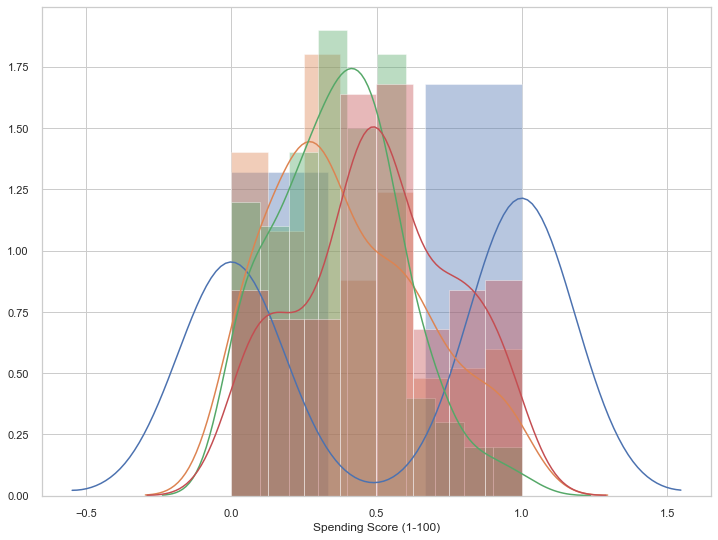

In [85]:
#Figure Plot -- Dataset is normalized quite successfully.
plt.figure(figsize=(12,9))
sns.distplot(mall_scaled[features[0]])
sns.distplot(mall_scaled[features[1]])
sns.distplot(mall_scaled[features[2]])
sns.distplot(mall_scaled[features[3]])

print("_____________________________________________")
print("")
print("Insights: Mall Dataset is well distributed")

<Figure size 864x648 with 0 Axes>

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x1c2352bc50>,
                 k=None, locate_elbow=True, metric='distortion', model=None,
                 timings=True)

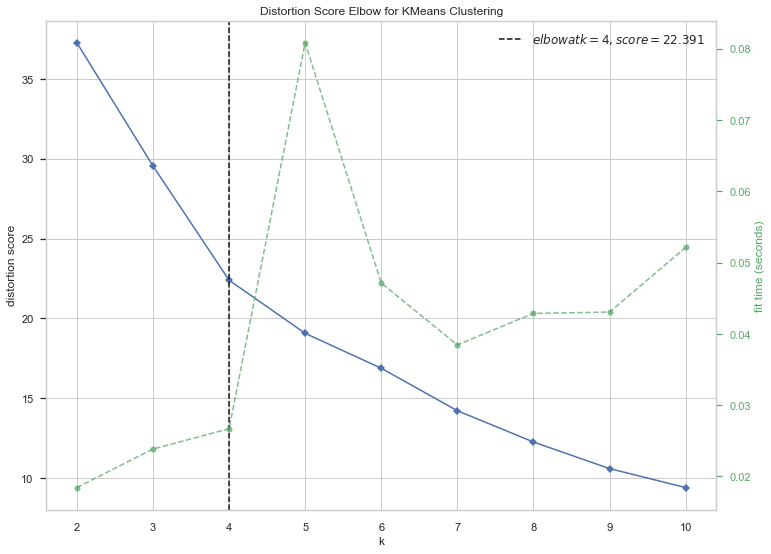

_____________________________________________

Insights: 4 is the optimal number of clusters.


In [86]:
#KElbowVisualizer -- finding the optimal number of clusters by visually inspecting model for the "elbow".
from yellowbrick.cluster import KElbowVisualizer

plt.figure(figsize=(12,9))

visualizer = KElbowVisualizer(model=KMeans())
visualizer.fit(mall_scaled)
visualizer.show()


print("_____________________________________________")
print("")
print("Insights: 4 is the optimal number of clusters.")


<Figure size 864x648 with 0 Axes>

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x1c234aa048>,
                     colors='yellowbrick', is_fitted='auto', model=None)

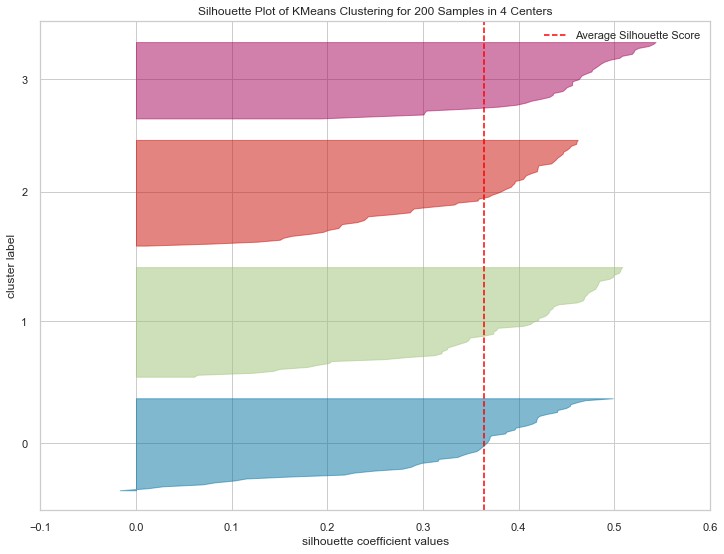

In [87]:
#Making sure that each cluster is above the Average Silhouette Score

from yellowbrick.cluster import SilhouetteVisualizer

plt.figure(figsize=(12,9))

visualizer = SilhouetteVisualizer(model=KMeans(n_clusters=4, random_state=0), 
                                  colors='yellowbrick')
visualizer.fit(mall_scaled)
visualizer.show()



<Figure size 864x648 with 0 Axes>

InterclusterDistance(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x1c22e2ff28>,
                     embedding='mds', is_fitted='auto', legend=True,
                     legend_loc='lower left', legend_size=1.5, max_size=25000,
                     min_size=10000, model=None, random_state=None,
                     scoring='membership')

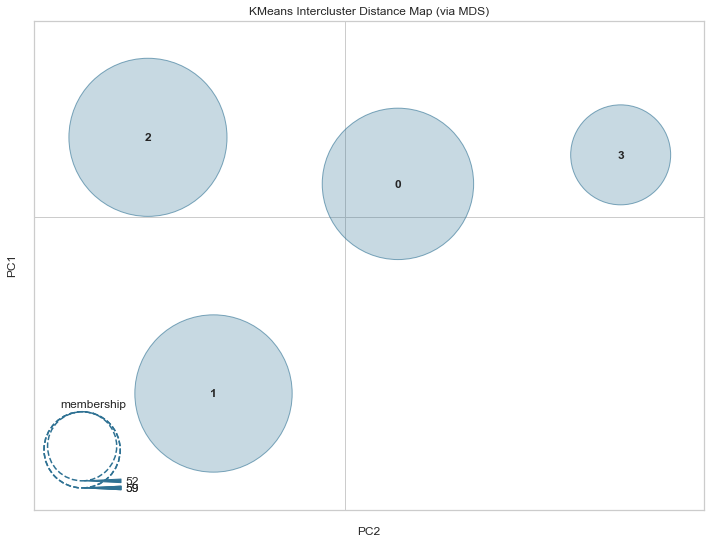

In [69]:
from yellowbrick.cluster import InterclusterDistance

plt.figure(figsize=(12,9))

visualizer = InterclusterDistance(KMeans(4, random_state=42), min_size=10000)
visualizer.fit(mall_scaled)
visualizer.show()

### Apply KMeans

In [98]:
# Centroids

model = KMeans(n_clusters=4, random_state=0)
model.fit(mall_scaled)

model.labels_
model.cluster_centers_

pd.DataFrame(model.cluster_centers_, columns=mall.columns)

# BECAUSE WE SCALED WE HAVE TO BRING IT BACK TO THE ORIGINAL RANGES

pd.DataFrame(mall_scaled_fit.inverse_transform(model.cluster_centers_),columns=mall.columns)

# --- Now with these values we can have an interpretation of what each cluster means ---
#my: clusterig for segmentation, used widely

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

array([3, 3, 2, 1, 1, 1, 2, 1, 0, 1, 0, 1, 2, 1, 0, 3, 2, 3, 0, 1, 0, 3,
       2, 3, 2, 3, 2, 3, 2, 1, 0, 1, 0, 3, 2, 1, 2, 1, 2, 1, 2, 3, 0, 1,
       2, 1, 2, 1, 1, 1, 2, 3, 1, 0, 2, 0, 2, 0, 1, 0, 0, 3, 2, 2, 0, 3,
       2, 2, 3, 1, 0, 2, 2, 2, 0, 3, 2, 0, 1, 2, 0, 3, 0, 2, 1, 0, 2, 1,
       1, 2, 2, 3, 0, 2, 1, 3, 2, 1, 0, 3, 1, 2, 0, 3, 0, 1, 2, 0, 0, 0,
       0, 1, 2, 3, 1, 1, 2, 2, 2, 2, 3, 2, 1, 3, 1, 1, 0, 3, 0, 3, 0, 3,
       1, 1, 0, 1, 2, 3, 0, 1, 2, 3, 1, 1, 0, 3, 0, 1, 2, 3, 0, 3, 2, 1,
       2, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 2, 3, 0, 3, 0, 3, 2, 1,
       0, 3, 0, 3, 2, 1, 0, 1, 2, 3, 2, 3, 2, 1, 2, 1, 0, 1, 2, 1, 2, 3,
       0, 3], dtype=int32)

array([[3.33066907e-16, 6.04567308e-01, 3.88661202e-01, 2.87840136e-01],
       [1.00000000e+00, 2.00742240e-01, 3.66120219e-01, 6.80451128e-01],
       [1.00000000e+00, 5.79020979e-01, 3.59165425e-01, 3.44712430e-01],
       [2.22044605e-16, 1.97115385e-01, 3.85245902e-01, 7.21173469e-01]])

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,3.330669e-16,0.604567,0.388661,0.287840
1,1.000000e+00,0.200742,0.366120,0.680451
2,1.000000e+00,0.579021,0.359165,0.344712
3,2.220446e-16,0.197115,0.385246,0.721173


,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,3.330669e-16,49.437500,62.416667,29.208333
1,1.000000e+00,28.438596,59.666667,67.684211
2,1.000000e+00,48.109091,58.818182,34.781818
3,2.220446e-16,28.250000,62.000000,71.675000


###  Clustering Methods Evaluation: Business Interpretation

#### How do we interpret these four clusters?

##### Cluster 0: Older, Conservative, Females
Most likely older females who are characterized by a high income and a low spending score (aka, they don't like to spend as much as young folks). Perhaps because this group is older, they are not very interested in spending money at this point of their lives. They might be more into savings and investing.  

##### Cluster 1:  Young, Rich, Males
Rather male, high spenders with average incomes and young of age. These young boys are already spending a lot compared to their older counterparts. As they grow, we assume also their income will rise, thus generating a possible lead for an impulsive buyer and good customer.  

##### Cluster 2: Older, Conservative, Males
Most likely older males who are characterized by a high income and a low spending score. Perhaps because this group is older, they are not very interested in spending money at this point of their lives. They might be more into savings and investing.  

##### Cluster 3: Young, Rich, Females
Most likely young, rich females. High spenders with an average income and young age. Due to their young age, similarly to group 1, they might be very likely to grow up pursuing this behavior.


Interestingly enough. Young folks are more keen to spend their income compared to their older counterparts. 

<hr style="height:3px">



<h1>2) Clustering -2 </h1>

Use the same dataset with an alternative clustering algorithm (hierarchical if you used k-means before or viceversa) and comment the results. Are there significant differences?

Please print the dendograms. 

Did you find significative differences when using an alternative method (eg. size of clusters,... )? Please commment! 

Do you think the Dendogram could add value and explainability to the marketing department?



<Figure size 1224x648 with 0 Axes>

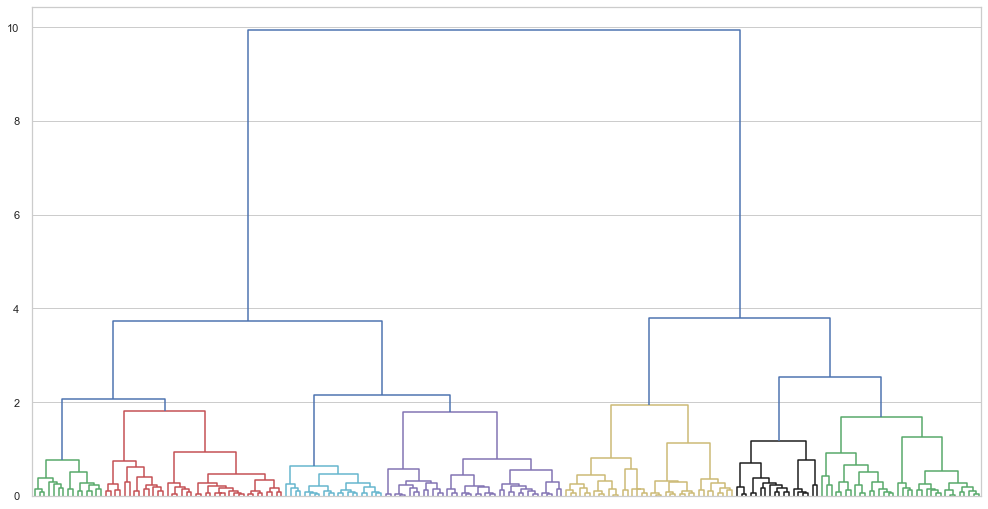

In [101]:
# Import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

plt.figure(figsize=(17,9))

# create dendrogram
dn = sch.dendrogram(sch.linkage(mall_scaled, method='ward'), 
                    no_labels=True, 
                    color_threshold=2)


plt.show()

### Clustering Methods Evaluation: Significative Differences

#### Hierarchical Clustering: Clusters size increased to seven! 

Through the Hierarchical Clustering Method we spotted significative differences. This alternative methodprovided us with three extra clusters. The Dendogram could add value and explainability to the marketing department by further exploring our initial clusters. Thanks to this method we can better target customer groups and create look-alike audiences. 

<hr style="height:3px">



### Some more Data Exploration

In [213]:
X = mall.iloc[:, [2,3]].values

X[:]

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

(0, 143.85)

Text(0.5, 0, 'Annual Income (k$)')

(0, 103.95)

Text(0, 0.5, 'Spending Score (1-100)')

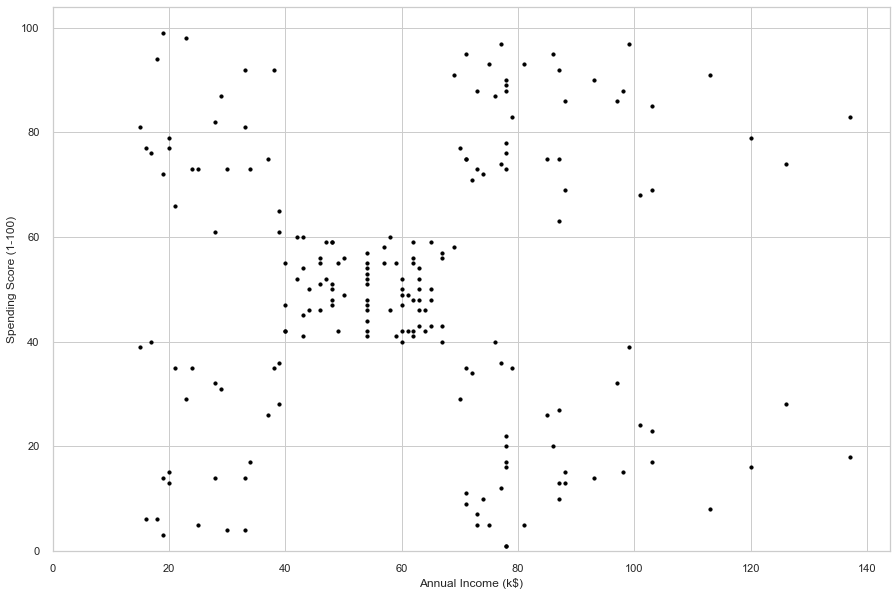

In [219]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,10))
plt.scatter(x=X[:,0], y=X[:,1], s=10, color='black')
plt.xlim(0, X[:,0].max() + X[:,0].max()*0.05)
plt.xlabel(features[2])
plt.ylim(0, X[:,1].max() + X[:,1].max()*0.05)
plt.ylabel(features[3])

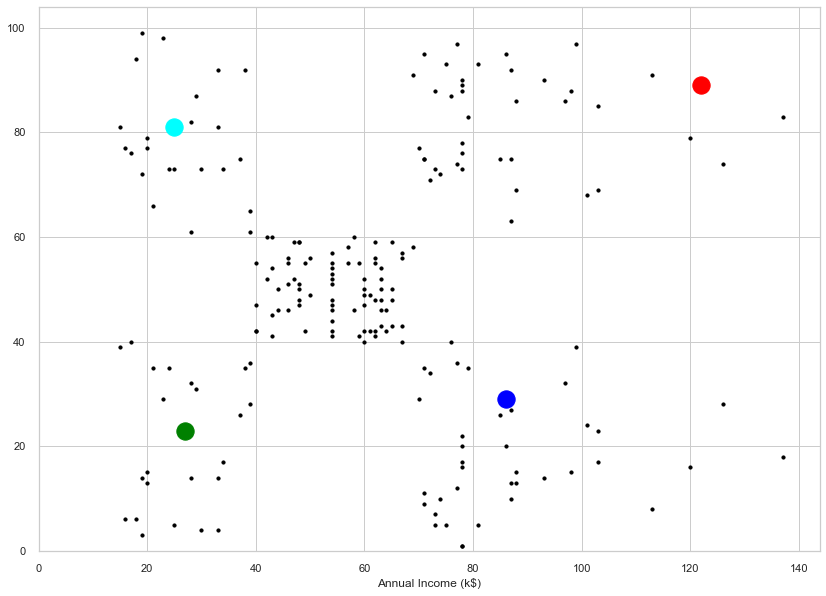

In [231]:
import matplotlib.pyplot as plt

# Step 1: Choose the number K of clusters
number_clusters = 4

# Step 2: Select a random K points (the initial centroids)
X_low = X[:,0].min()
X_high = X[:,0].max()
Y_low = X[:,1].min()
Y_high = X[:,1].max()

# If you active this code of line, you'll see that the initialisation will stay the same every time
np.random.seed(14) # 14 happens to give a nice random initialisation

X_axis, Y_axis = [], []
for i in range(number_clusters):
    X_axis.append(np.random.randint(low=X_low, high=X_high))
    Y_axis.append(np.random.randint(low=Y_low, high=Y_high)) 

# --- Graph stuff ---
colors = ['red', 'green', 'blue', 'cyan', 'magenta']
def plot1(X_axis, Y_axis):
    fig, ax = plt.subplots(figsize=(14,10))
    plt.scatter(x=X[:,0], y=X[:,1], s=10, color='black')
    
    for i in range(number_clusters):
        plt.scatter(x=X_axis[i], y=Y_axis[i], s=300, color=colors[i])

    plt.xlim(0, X_high + X_high*0.05)
    plt.xlabel(features[1])
    plt.ylim(0, Y_high + Y_high*0.05)
    plt.xlabel(features[2])
    return fig, ax

fig, ax = plot1(X_axis, Y_axis)

<Figure size 864x648 with 0 Axes>

<Figure size 864x648 with 0 Axes>

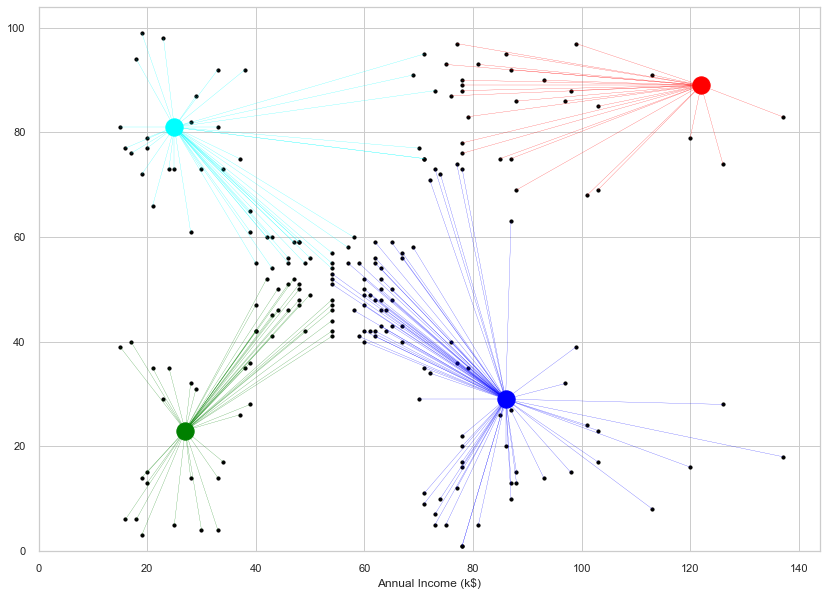

In [232]:
# Step 3: Assign each datapoint to the nearest centroid
plt.figure(figsize=(12,9))
fig, ax = plot1(X_axis, Y_axis)

def draw_lines(X_axis, Y_axis, fig, ax):
    closest_cluster = []
    for observation in X:
        distances = []
        for X_cluster, Y_cluster in zip(X_axis, Y_axis):
            X_difference = np.absolute(observation[0] - X_cluster)
            Y_difference = np.absolute(observation[1] - Y_cluster)
            distances.append(np.sqrt(X_difference ** 2 + Y_difference ** 2))
        closest_cluster.append(np.argmin(distances))
    clusters = [[] for i in range(number_clusters)]
    for observation, cluster in zip(X, closest_cluster):
        ax.add_line(mlines.Line2D(xdata=[observation[0], X_axis[cluster]], 
                                  ydata=[observation[1], Y_axis[cluster]], 
                                  linewidth=0.2, 
                                  color=colors[cluster]))
        clusters[cluster].append(list(observation))
    return fig, ax, clusters

fig, ax, clusters = draw_lines(X_axis, Y_axis, fig, ax)

<Figure size 864x648 with 0 Axes>

<Figure size 864x648 with 0 Axes>

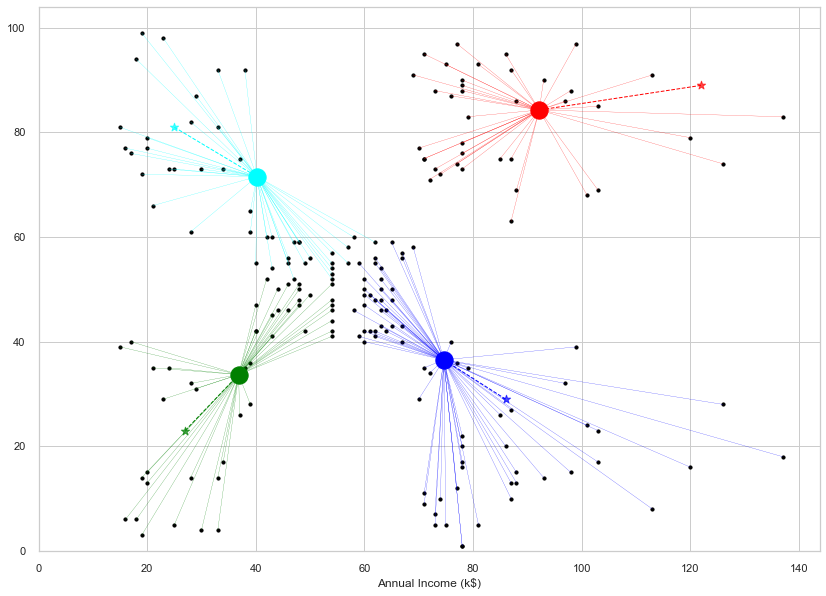

In [233]:
# Step 4: Compute and place the new centroid of each cluster
X_axis_new, Y_axis_new = [], []
for cluster in clusters:
    means = np.mean(cluster, axis=0)
    X_axis_new.append(means[0])
    Y_axis_new.append(means[1])
    
plt.figure(figsize=(12,9))
fig, ax = plot1(X_axis_new, Y_axis_new)
fig, ax, clusters = draw_lines(X_axis_new, Y_axis_new, fig, ax)

# Step 5: Assign each datapoint to the new nearest centroids (if a change happened, do step 4 again)
i = 0
for old_X, new_X, old_Y, new_Y in zip(X_axis, X_axis_new, Y_axis, Y_axis_new):
    plt.scatter(x=old_X, y=old_Y, s=75, color=colors[i], alpha=0.7, marker='*')
    ax.add_line(mlines.Line2D(xdata=[old_X, new_X], 
                              ydata=[old_Y, new_Y], 
                              linewidth=1, 
                              color=colors[i],
                              linestyle='--'))
    i += 1

#### This Visualization helps us differentiation between our four clusters.

<hr style="height:3px">



<h1>3) Classification - 1</h1>
<img src="Bank_Churn.png">

You have a dataset of Bank customers (Bank_Churn.csv) with 10K customers and 14 attributes, some of them useless such as "surename". The last atrribute tells us if they left the bank or not. This is called customer churn, which is when a customer ceases the relationship with a company. Obviously a major priority for any business is to avoid or at least reduce churn. 

Our first job is to understand why these customers leave. 

Our first attempt to do this will be knowing the importance of each feature for predicting churn. You are asked to use any tree ensamble algorithm that you wish (RandomForest, ExtraTrees, ... ) and produce an histogram using scikit-learn conventions that describes the importance of each feature.

After this you must add a written comment for the marketing department. 

Please, keep in mind that this is an unbalanced dataset. Fortunately, most of the clients don't leave the bank! 


In [234]:
# PREPROCESSING & MODEL SELECTION

import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, cross_val_score

# PLOTTING
import matplotlib.pyplot as plt
import seaborn as sns

# STANDARD MODELS
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# ENSEMBLE
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

# XGBOOST
from xgboost import XGBClassifier

### Load and Clean the Bank Churn Dataset

In [235]:
#Load Bank Customers Data

data = pd.read_csv('Bank_Churn.csv')

data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [236]:
#Explore Data
data.info()
data.isna().sum()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [237]:
#drop unnecessary columns

data = data.drop(['RowNumber', 'Surname', 'CustomerId',  ], axis=1)

In [238]:
#Encode non-numerical values:
for column in data.select_dtypes('object'):
    print(f'{column:25s}: {data[column].unique()}') 

Geography                : ['France' 'Spain' 'Germany']
Gender                   : ['Female' 'Male']


In [239]:
#binarize gender

data.Gender.unique()
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

data.head()

array(['Female', 'Male'], dtype=object)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0


In [240]:
#do the same for Geography

#explore geography
#data.Geography.unique()

#data['Geography'] = data['Geography'].map({'France': 0, 'Spain': 1, 'Germany': 3})


In [241]:
#get dummies for geography

for column in data.select_dtypes('object'):
    if len(data[column].unique()) == 2:
        data[column] = pd.get_dummies(data[column], dtype='int64')
    else:
        data = pd.get_dummies(data, prefix=column, columns=[column], drop_first=False, dtype='int64')

In [242]:
# Finally Separate the data into input and output components with pandas df

X = data.drop('Exited', axis=1).values
y = data['Exited'].values
print(X.shape, y.shape)

(10000, 12) (10000,)


In [243]:
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [244]:
#rearrange churn

data = data[['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance','NumOfProducts','HasCrCard', 'IsActiveMember', 'EstimatedSalary','Geography_France', 'Geography_Germany', 'Geography_Spain','Exited']]

In [245]:
data.head(40)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Exited
0,619,1,42,2,0.00,1,1,1,101348.88,1,0,0,1
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,1,42,8,159660.80,3,1,0,113931.57,1,0,0,1
3,699,1,39,1,0.00,2,0,0,93826.63,1,0,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,1,0
5,645,0,44,8,113755.78,2,1,0,149756.71,0,0,1,1
6,822,0,50,7,0.00,2,1,1,10062.80,1,0,0,0
7,376,1,29,4,115046.74,4,1,0,119346.88,0,1,0,1
8,501,0,44,4,142051.07,2,0,1,74940.50,1,0,0,0
9,684,0,27,2,134603.88,1,1,1,71725.73,1,0,0,0


### Ensemble Random Forest

In [ ]:
#Select X and y

X = data.drop('Exited', axis=1).values
y = data['Exited'].values

print(X.shape,y.shape)

In [254]:
def evaluate_ensembles(X, y, max_features=10, n_estimators=50, n_splits=10, shuffle=True, random_state=0):
    models = [
        ('BaggingClassifier',          BaggingClassifier(n_estimators=n_estimators,
                                                         max_features=max_features, 
                                                         random_state=random_state)),
        
        ('RandomForestClassifier',     RandomForestClassifier(n_estimators=n_estimators, 
                                                              max_features=max_features, 
                                                              random_state=random_state)),
        
        ('ExtraTreesClassifier',       ExtraTreesClassifier(n_estimators=n_estimators, 
                                                            max_features=max_features, 
                                                            random_state=random_state)),
        
        ('AdaBoostClassifier',         AdaBoostClassifier(n_estimators=n_estimators, 
                                                          random_state=random_state)),
        
        ('GradientBoostingClassifier', GradientBoostingClassifier(n_estimators=n_estimators, 
                                                                  max_features=max_features, 
                                                                  random_state=random_state))]

    kfold = KFold(n_splits=n_splits, shuffle=shuffle, random_state=random_state)
    
    results = []
    for model in models:
        res = cross_val_score(model[1], X, y, cv=kfold)
        [results.append((model[0], r)) for r in res]
    
    results = pd.DataFrame(results, columns=['Model', 'Result'])
    return results

<Figure size 1080x648 with 0 Axes>

[Text(0, 0, 'BaggingClassifier'),
 Text(0, 0, 'RandomForestClassifier'),
 Text(0, 0, 'ExtraTreesClassifier'),
 Text(0, 0, 'AdaBoostClassifier'),
 Text(0, 0, 'GradientBoostingClassifier')]

Bank Churn Dataset Results:


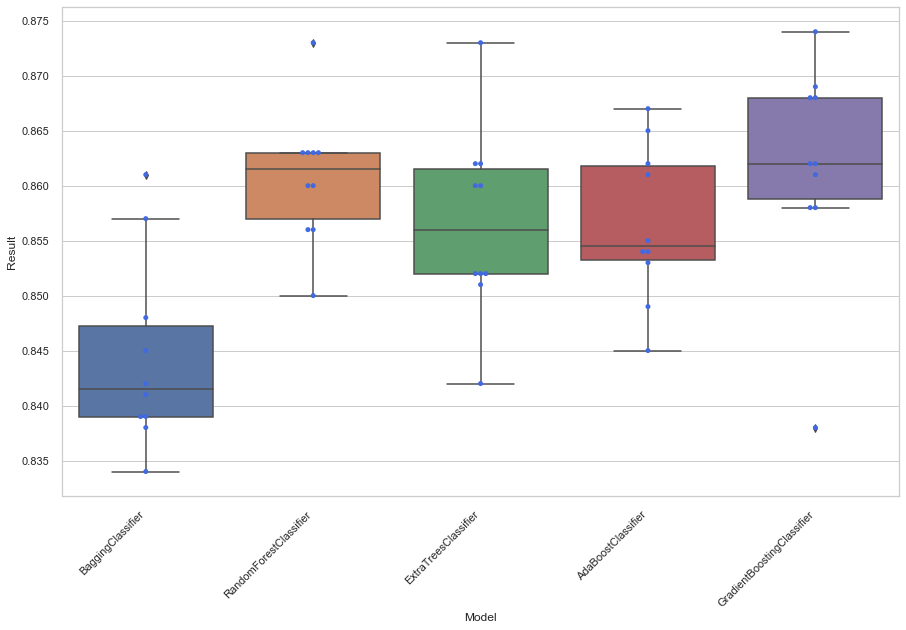

In [255]:
results = evaluate_ensembles(X, y, max_features=6)

plt.figure(figsize=(15,9))
chart = sns.boxplot(data=results, x='Model', y='Result')
chart = sns.swarmplot(data=results, x='Model', y='Result', color="royalblue")
chart.set_xticklabels(labels=results['Model'].unique(), rotation=45, horizontalalignment='right')

print('Bank Churn Dataset Results:')

In [249]:
#TRY: Attempting with HistGradientBoosting Classifier

# To use this experimental feature, we need to explicitly ask for it:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingClassifier

clf = HistGradientBoostingClassifier().fit(X, y)
clf.score(X, y)


0.9078

In [250]:
data.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_France',
       'Geography_Germany', 'Geography_Spain', 'Exited'],
      dtype='object')

<Figure size 1512x648 with 0 Axes>

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=2, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=7, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

CreditScore      0.0215
Gender           0.0204
Age              0.3941
Tenure           0.0046
Balance          0.0679
NumOfProducts    0.3369
HasCrCard        0.0015
IsActiveMember   0.0747
EstimatedSalary  0.0124
Geography_France  0.0228
Geography_Germany  0.0367
Geography_Spain  0.0064


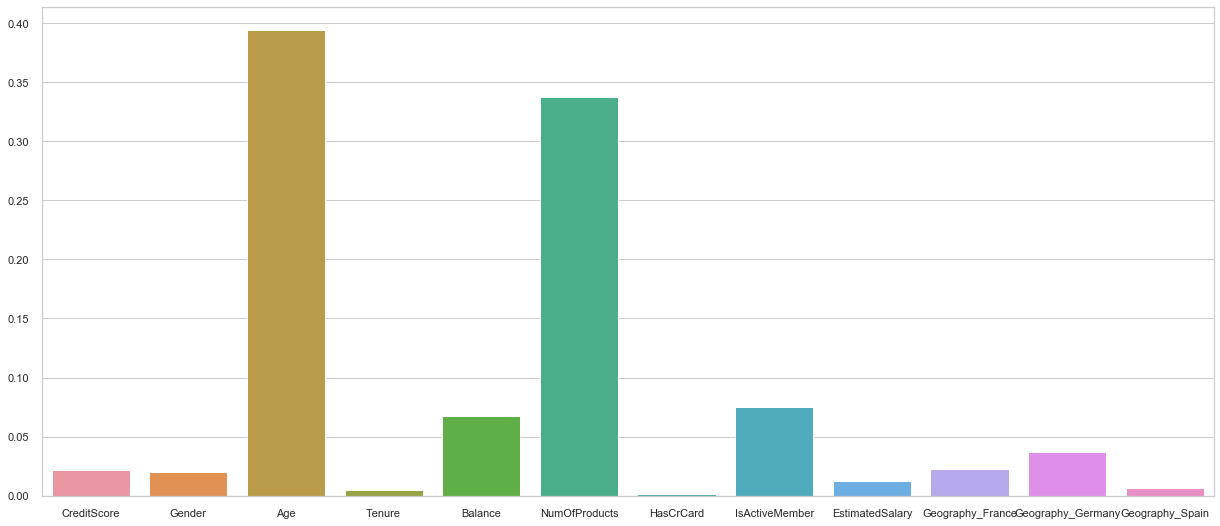

In [256]:
# Random Forest: Feature importance:

plt.figure(figsize=(21,9))

from sklearn.ensemble import RandomForestClassifier

seed=7

num_trees=100
num_features=2

model=GradientBoostingClassifier(n_estimators=num_trees, max_features=num_features, random_state=seed)
model.fit(X,y)

for name, importance in zip(data.columns, model.feature_importances_):
    print(f'{name:15s}  {importance:.4f}')

sns.barplot(x=data.columns[:-1], y=model.feature_importances_)

### Business Interpration

#### The most important features that determining whether a customer is more likely to drop out from the Bank include: Age, Number of Products and also whether the customer is an active member. Surprisingly, the feature from Germany is also a bit likely to help us determine whether the customer will leave or not.

 Dear Marketing Team, 
 We believe that you should focus on a specific type of customer in order to reduce the churn rate of the bank.
 Our research suggests that customers that are facing a middle-age shock (age), who probably rely only on a little amount of products/services offered by the bank, are more likely to churn. These customers are not very active, thus it's urgent to reach out to those who do not use the Bank as much as other customers. Reach them with some promotions, keep them engaged and in the loop!
In case do you want to start testing a marketing strategy, we suggest beginning from Germany, customers are slightly more inclined to churn over there. 


<hr style="height:3px">



# 4) Classification - 2

The marketing department seems to be very happy with your work and asks for further details. 

This time you are asked to produce a Decision Tree with the objective of having an educated guess on the accuracy of the model that can be produced in order to prevent, or at least attempt to prevent, churn. 

Together with that you are asked to print the first 3 levels of the tree and comment them. The objective is no other than to be fully aware of the main conditions that drive churn. 

This second part can be done with scikit-learn or BigML (just copy and paste the resulting images) as you wish. 


In [258]:
#Now we standarize our data 

std_scaler=preprocessing.StandardScaler()
X_std=std_scaler.fit_transform(X)

minmax_scaler=preprocessing.MinMaxScaler()
X_minmax=minmax_scaler.fit_transform(X)

# Create the DataFrames for plotting
resall=pd.DataFrame()
res_w1=pd.DataFrame()
res_w2=pd.DataFrame()
res_w3=pd.DataFrame()

In [259]:
# Decision Trees

from sklearn.tree import DecisionTreeClassifier

seed=7

kfold=KFold(n_splits=10, random_state=seed)

model=DecisionTreeClassifier(class_weight="balanced", random_state=seed)


results=cross_val_score(model, X, y, cv=kfold)

print(f'Decision Tree - Accuracy {results.mean()*100:.3f}% std {results.std()*100:3f}')

results_scl=cross_val_score(model, X_std, y, cv=kfold)

print(f'Decision Tree with Standardized X (-1..1) - Accuracy {results_scl.mean()*100:.3f}% std {results_scl.std()*100:3f}')

results_minmax=cross_val_score(model, X_minmax, y, cv=kfold)

print(f'Decision Tree with Scaled X ( 0..1) - Accuracy {results_minmax.mean()*100:.3f}% std {results_minmax.std()*100:3f}')

res_w1["Res"]=results
res_w1["Type"]="DT"

res_w2["Res"]=results_scl
res_w2["Type"]="DT -1..1"

res_w3["Res"]=results_minmax
res_w3["Type"]="DT 0..1"

resall=pd.concat([resall,res_w1,res_w2,res_w3], ignore_index=True)


print("We notice that accuracy does not change much, no need to scale or standardize this dataset.")

Decision Tree - Accuracy 80.420% std 0.969330
Decision Tree with Standardized X (-1..1) - Accuracy 80.450% std 0.946837
Decision Tree with Scaled X ( 0..1) - Accuracy 80.480% std 1.040000
We notice that accuracy does not change much, no need to scale or standardize this dataset.


In [260]:
# Displaying a tree

from IPython.display import HTML

from sklearn import tree
from graphviz import Source
from IPython.display import SVG, display
from ipywidgets import interactive

seed=7

# note to self: adapt "tim_tree"

def plot_tree(crit, split, depth, min_split, min_leaf=1):
    
    tim_tree=DecisionTreeClassifier(random_state=seed,
                criterion=crit,
                splitter=split,
                max_depth=depth,
                min_samples_split=min_split,
                min_samples_leaf=min_leaf)
    tim_tree.fit(X,y)
    
    graph=Source(tree.export_graphviz(tim_tree,
            out_file=None,
            feature_names=data.columns[0:-1],
            class_names=["0","1","2"],
            filled=True,
            rounded=True))
    display(SVG(graph.pipe(format="svg")))
    
    return tim_tree

inter=interactive(plot_tree,
        crit=["gini","entropy"],
        split=["best","random"],
        depth=[None,1,2,3,4],
        min_split=(2,100),
        min_leaf=(1,200))

display(inter)

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

##### We used a decision tree to further validate our findings.

With an accuracy nearly to 80%, we notice that relative young customers (under 42 years old) are more likely to drop out when they are not very active on their Bank account, thus probably using a few products/services and probably interested in dropping this bank to try out a new one. Furthermore, having a low balance might lead to dropping out. 

<hr style="height:3px">



# 5) Classification - 3 

The marketing department is really happy with your work and wants to put it into production. Firstly, with weekly alams to branch directors flagging the customers that could potentially leave. 

In order to implement this they ask you a more refined version using a Random Forest, in Python, together with the model saved with Pickle (you don't need to upload the model to the moodle, just the code). 

You also have to provide the accuracy with a k-fold estimation, together with the standard deviation of the accuracy. 



In [261]:
# Grid Search Parameter Tuning

from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import GridSearchCV

seed=7

kfold=KFold(n_splits=10, random_state=seed)

alphas=np.array([1, 0.1, 0.01, 0.001, 0.0001, 0])
param_grid= dict(alpha=alphas)

model= RidgeClassifier()
grid=GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold)
grid.fit(X,y)

# the default score is accuracy 

print(f'Grid Best Score {grid.best_score_:.5f} Alpha {grid.best_estimator_.alpha:.3f}')




GridSearchCV(cv=KFold(n_splits=10, random_state=7, shuffle=False),
             error_score='raise-deprecating',
             estimator=RidgeClassifier(alpha=1.0, class_weight=None,
                                       copy_X=True, fit_intercept=True,
                                       max_iter=None, normalize=False,
                                       random_state=None, solver='auto',
                                       tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 0.e+00])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

Grid Best Score 0.80730 Alpha 1.000


In [262]:
# Grid Search Parameter Tuning
#    now with Random Forests

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

seed=7

kfold=KFold(n_splits=10, random_state=seed)

num_trees=100
num_features=3

num_features=np.array([3, 4, 5, 6])
param_grid=dict(max_features=num_features)

model=RandomForestClassifier(n_estimators=num_trees, random_state=seed)
grid=GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold)
grid.fit(X,y)

# the default score is accuracy 

print(f'Grid Best Score {grid.best_score_*100:.5f} N. of features {grid.best_estimator_.max_features:.3f}')


GridSearchCV(cv=KFold(n_splits=10, random_state=7, shuffle=False),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=7,
                                              verbose=0, warm_start=False),
       

Grid Best Score 86.30000 N. of features 3.000


In [281]:
#PICKLE

from sklearn.linear_model import LogisticRegression

from pickle import dump
from pickle import load

seed=7

X_train,X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=seed)

model=LogisticRegression(solver="liblinear")
model.fit(X_train,y_train)

# Now we save it into a file
filename="log_model.sav"
dump(model, open(filename, "wb"))


# .... some time later .... 


#load the model from disk
loaded_model=load(open(filename, "rb"))
result=loaded_model.score(X_test,y_test)

print(f'Loaded model - Accuracy {result.mean()*100:.3f}% ')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Loaded model - Accuracy 79.533% 


##### Control Accuracy with K-fold

Logistic regression, k-fold 10 - Accuracy 79.060% (1.029%)
Logistic regression, k-fold 10 - Accuracy 79.060%       Precision 39.611%       Recall 6.000%       F1 10.366%


PrecisionRecallCurve(ap_score=True,
                     ax=<matplotlib.axes._subplots.AxesSubplot object at 0x1c22efeba8>,
                     classes=None, encoder=None, fill_area=True,
                     fill_opacity=0.2, force_model=False, is_fitted='auto',
                     iso_f1_curves=False, iso_f1_values={0.2, 0.4, 0.6, 0.8},
                     line_opacity=0.8, micro=True, model=None, per_class=False)

0.31764352341091806

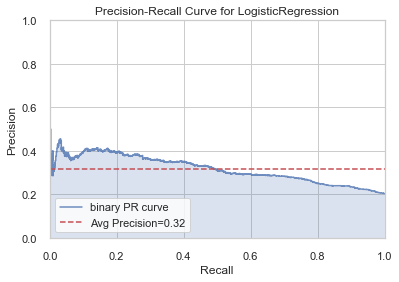

In [209]:
# Accuracy

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from yellowbrick.classifier import PrecisionRecallCurve


# KFold
splits=10
kfold=KFold(n_splits=splits, random_state=7)
scoring="accuracy"


#Logistic regression
model = LogisticRegression(solver='liblinear')

# Obtain the performance measure - accuracy
results = cross_val_score(model, X, y, scoring=scoring, cv=kfold)

print(f'Logistic regression, k-fold {splits:d} - Accuracy {results.mean()*100:.3f}% ({results.std()*100:.3f}%)')

# let's get precision, recall and f1 too

scoring = {'accuracy': 'accuracy',
           'recall': 'recall',
           'precision': 'precision',
           'f1': 'f1'}

results = cross_validate(model, X, y, scoring=scoring, cv=kfold)
print(f'Logistic regression, k-fold {splits:d} - Accuracy {results["test_accuracy"].mean()*100:.3f}% \
      Precision {results["test_precision"].mean()*100:.3f}% \
      Recall {results["test_recall"].mean()*100:.3f}% \
      F1 {results["test_f1"].mean()*100:.3f}%')


# Precision & Recall Curve
test_size=0.3
seed=7

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

viz=PrecisionRecallCurve(model)
viz.fit(X_train, y_train)
viz.score(X_test,y_test)
viz.show()


In [ ]:
# Confusion Matrix

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from yellowbrick.classifier import ConfusionMatrix


test_size=0.3
seed=7

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

y_predicted = model.predict(X_test)

c_matrix=confusion_matrix(y_test, y_predicted)

print("Confusion Matrix")
print(c_matrix)

print()
print(f'Accuracy {model.score(X_test, y_test)*100:.5f}')
print(f'Accuracy check with conf. matrix {(c_matrix[0,0]+c_matrix[1,1])/c_matrix.sum()*100:.5f}')


#using yellowbrick

cm = ConfusionMatrix(model, classes=["No Drop","Drop"])
# cm.fit(X_train, y_train)  #only if the model is not fitted

cm.score(X_test, y_test)
cm.show()


<hr style="height:3px">



# 6) Classification - 4

Somebody in the marketing department heard of a new algorithm called XGBoost that seems to be the best, or among the best, for this type of work !!! 

Of course, they ask you to try it and compare with the previous results. 

Therefore, you have to produce a classification with XGBoost and report the accuracy with k-fold providing also the standard deviation of the accuracy. 

If you have some time left, you can try to tune the model in order to report the best possible accuracy. 


In [264]:
from xgboost import XGBClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score

from sklearn import preprocessing

import xgboost as xgb

#### Let's try XGBoost through different models

In [279]:
# XGBoost
#  evaluated with train & test - remember we have a high variance !  

seed=7
test_size=0.3

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

# instantied the model
model=xgb.XGBClassifier()

# train the model on training data
model.fit(X_train, y_train)

# make predictions using tesst data
y_predict=model.predict(X_test)

# evaluate the predictions
accuracy = accuracy_score(y_test, y_predict)

print(f'XGBoost - Accuracy {accuracy*100:.3f}% std {results.std()*100:3f}')

print("With Train and Test split we reported already an improved accuracy!")
print("With a Test Size of 0.4, we report 85% accuracy. Thus, we tried different sizes to allow more flexibility to train the model. When test size was set to 0.3, accuracy increased to 86.20%, similarly when set to 0.2.")


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

XGBoost - Accuracy 86.200% std 0.336140
With Train and Test split we reported already an improved accuracy!
With a Test Size of 0.4, we report 85% accuracy. Thus, we tried different sizes to allow more flexibility to train the model. When test size was set to 0.3, accuracy increased to 86.20%, similarly when set to 0.2.


In [273]:
# XGBoost 
#   evaluated with KFold
#   in this case we use 3 splits because the amount of data is not large

seed=7

kfold=KFold(n_splits=3, random_state=seed)

#learner=DecisionTreeClassifier(class_weight="balanced", random_state=seed)
learner=xgb.XGBClassifier()

results=cross_val_score(model, X, y, cv=kfold)

print(f'XGBoost with kfold - Accuracy {results.mean()*100:.3f}% std {results.std()*100:3f}')


XGBoost with kfold - Accuracy 86.270% std 0.246385


In [274]:
# XGBoost 
#   evaluated with StratifiedKFold because of unbalanced classes
#   in this case we use 3 splits because the amount of data is not large

seed=7

kfold=StratifiedKFold(n_splits=3, random_state=seed)

learner=xgb.XGBClassifier()

results=cross_val_score(model, X, y, cv=kfold)

print(f'XGBoost with Stratified kfold - Accuracy {results.mean()*100:.3f}% std {results.std()*100:3f}')


XGBoost with Stratified kfold - Accuracy 86.330% std 0.336140


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

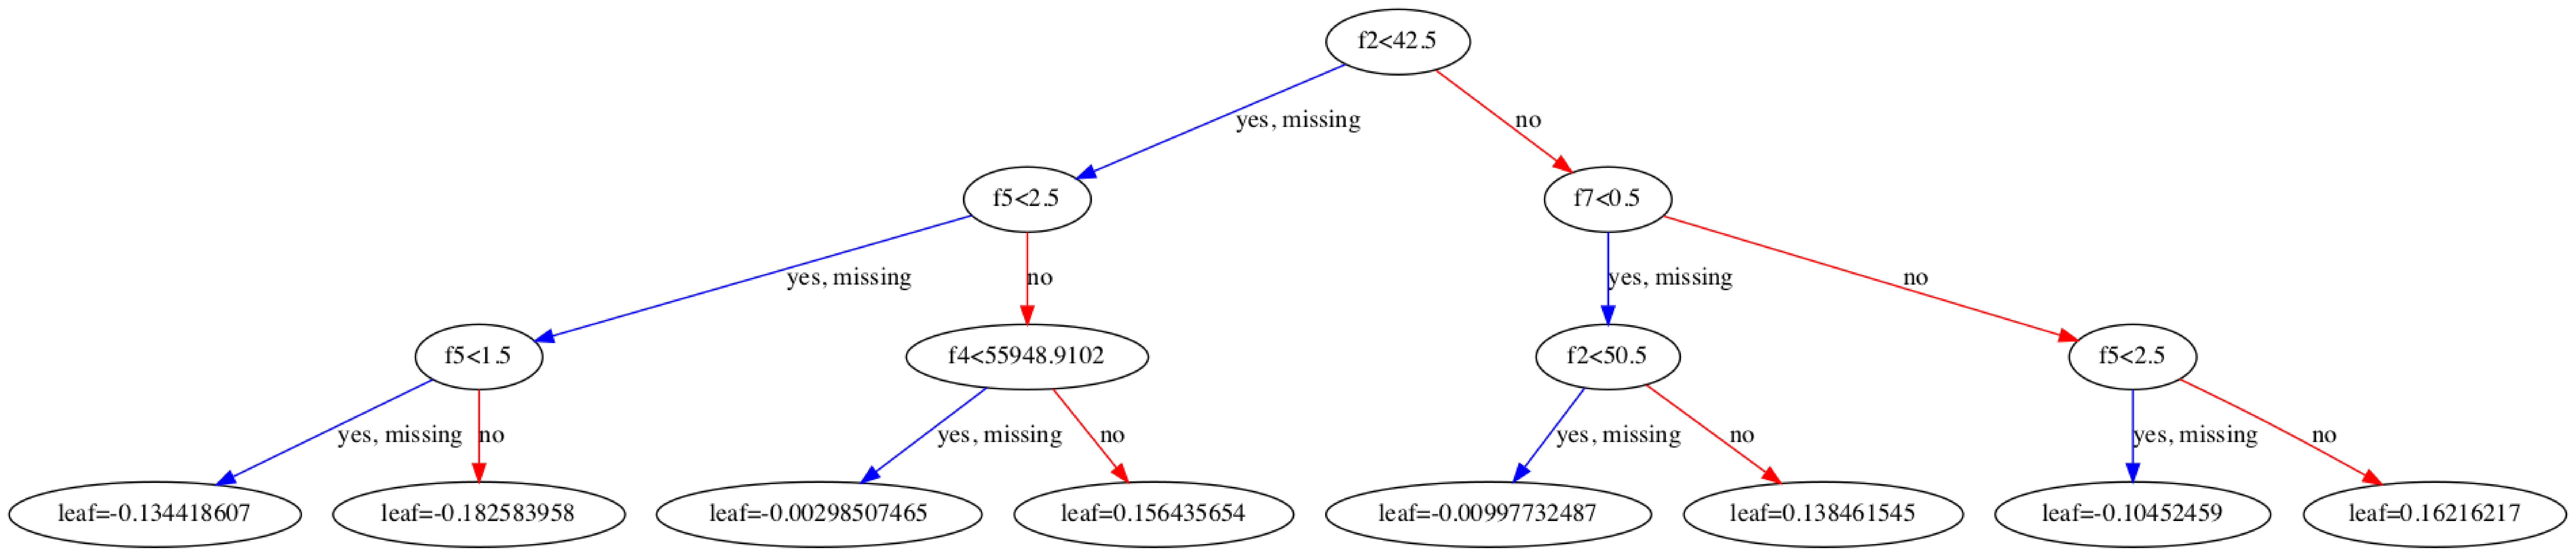

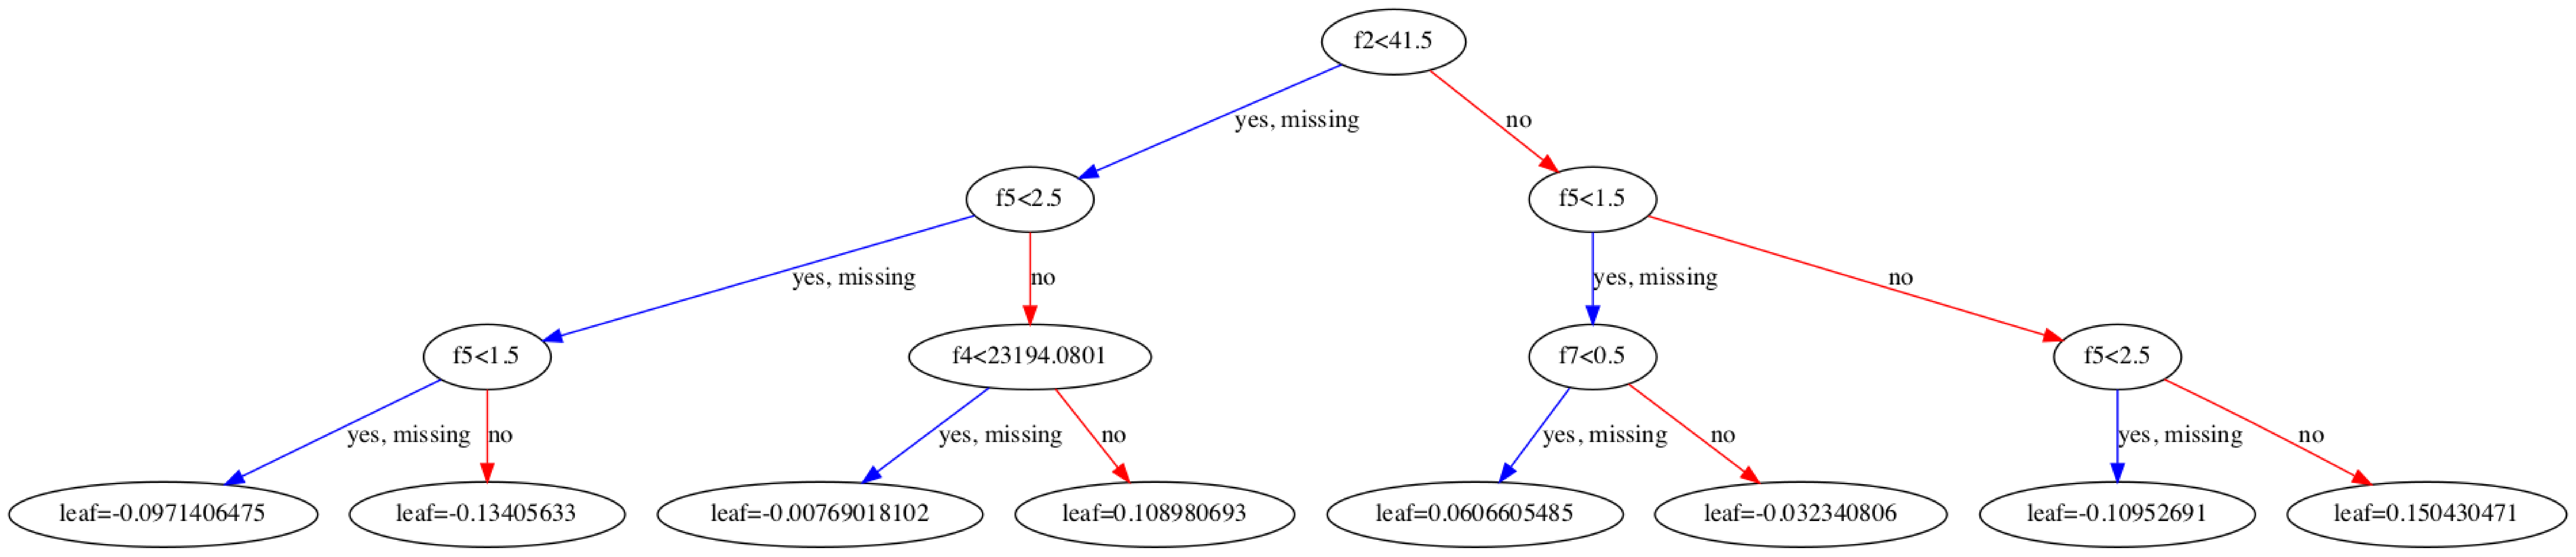

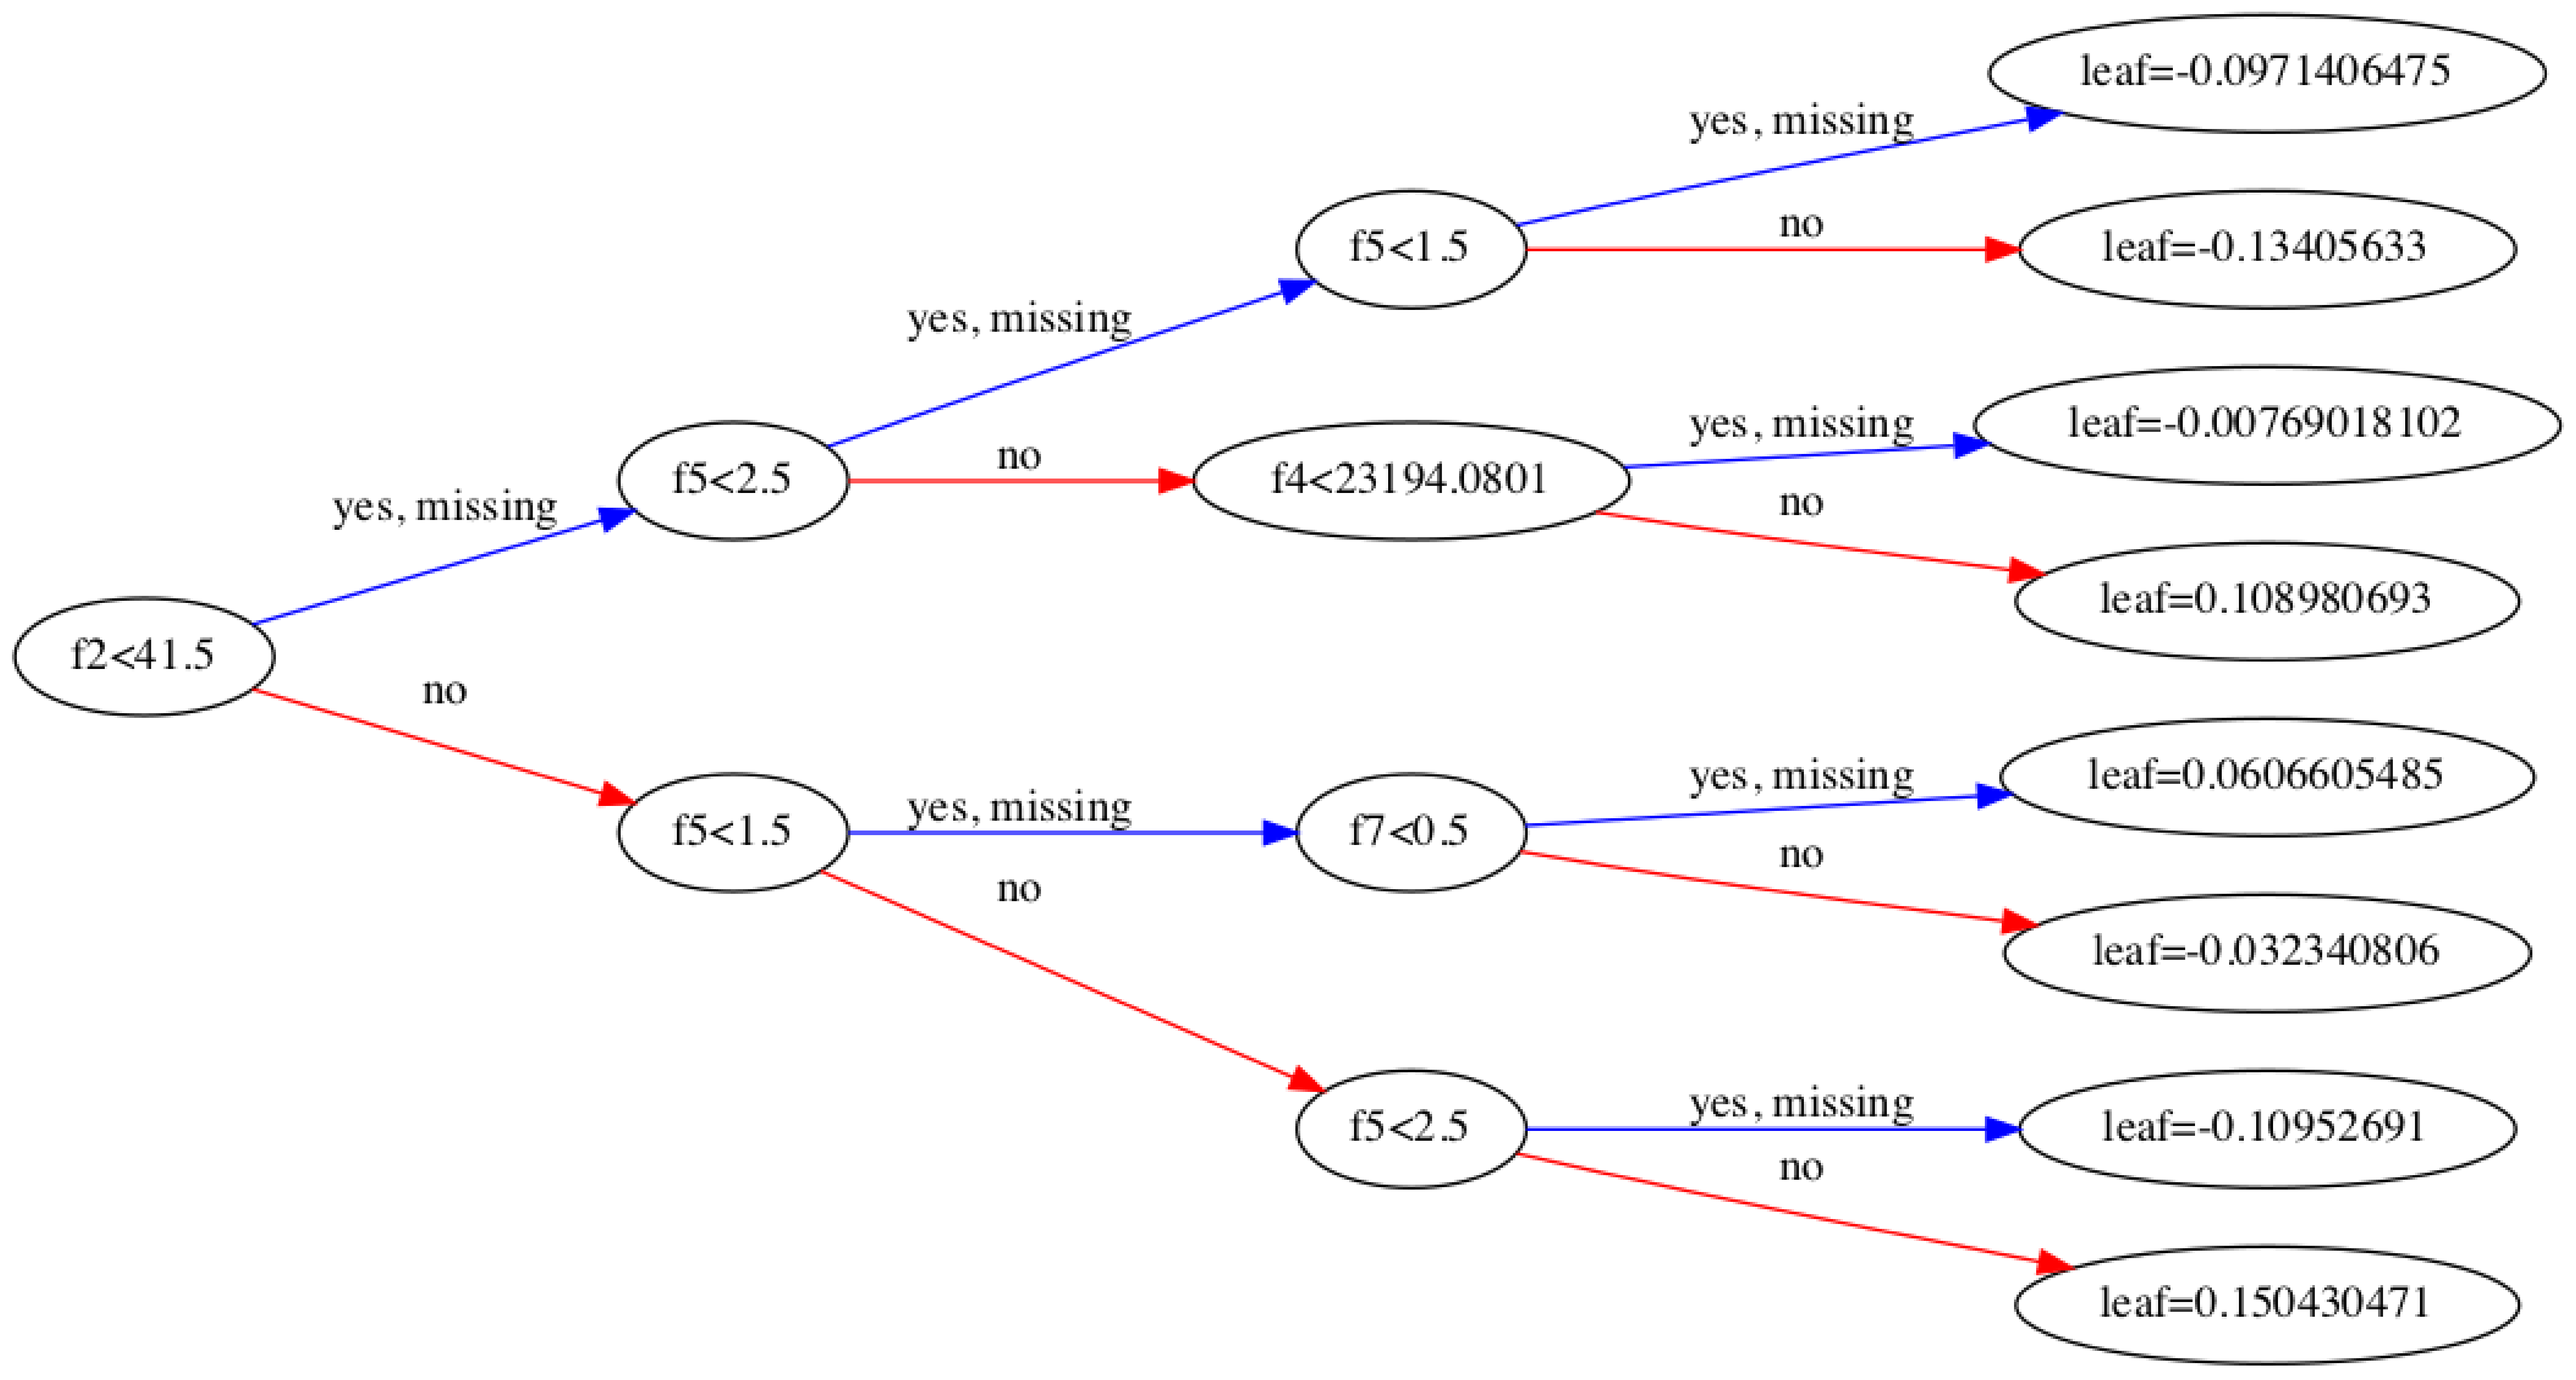

In [275]:
from matplotlib.pylab import rcParams

##set up the parameters
rcParams['figure.figsize'] = 150,150


model=XGBClassifier()

model.fit(X,y)

#plotting the first tree
xgb.plot_tree(model)

#plotting the fourth tree
xgb.plot_tree(model, num_trees=4)

#plotting from left to right 
xgb.plot_tree(model, num_trees=4, rankdir="LR")



### Final Findings: 

#### XGBoost with kFold led to an Accuracy of 86.270  % with a  Standard Deviation of 0.24 

 Overall, XGBoost is improving the Accuracy of our model. If the Decision Tree provided us with an Accuracy of nearly 80%, thanks XGBoost we now have an accuracy above 86% !

<hr style="height:3px">



#### Dear Professor Esteve,
Thank you for having introduced us to the wonderful world of AI. Despite the struggles, I will never forget your positive energy.

Kind Regards,

Lupo Benatti